# Importing the libraries

In [14]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Train and test set 

In [15]:
# Number of training and testing images
n_train, n_test = 157, 20

# Initialize lists to store training and testing data
train_data, test_data = [], []

# Loading the images

In [16]:
# Set the paths for your dataset
data_dir = r"C:\Users\nkulh\Downloads\face_data"  

# Load and process images
for filename in os.listdir(data_dir):
    img = Image.open(os.path.join(data_dir, filename)).convert('L')
    img_data = np.array(img).flatten()

    if n_train > 0:
        train_data.append(img_data)
        n_train -= 1
    else:
        test_data.append(img_data)

# Converting train and test set to array

In [17]:
# Convert the data lists to NumPy arrays
train_data, test_data = np.array(train_data), np.array(test_data)

# Centering the data and computing eigen values and eigenvectors

In [18]:
# Compute the mean face and subtract it from the training data
mean_face = np.mean(train_data, axis=0)
centered_train_data = train_data - mean_face

# Use SVD to get eigenvalues and eigenvectors
_, s, vh = np.linalg.svd(centered_train_data, full_matrices=False)
eigenvalues = s**2
eigenvectors = vh.T

# Sorting the Eigen vectors and values

In [19]:
# Sort the eigenvalues in descending order and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues, eigenvectors = eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

# Selecting top 10 Eigenfaces and visualizing them

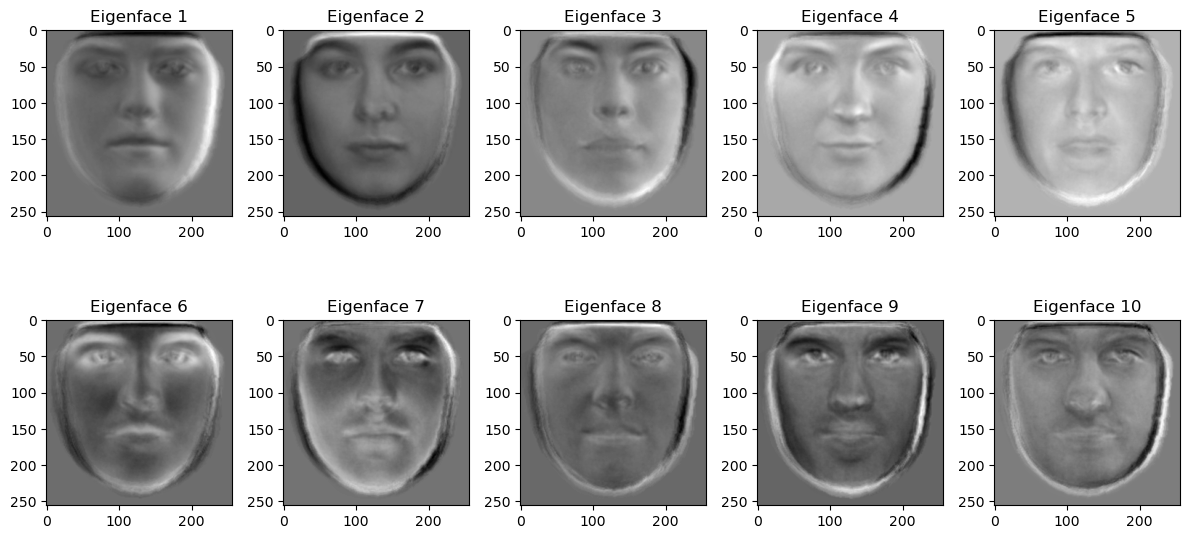

In [20]:
# Visualize the top 10 eigenfaces
K_eigenfaces = 10
top_eigenfaces = eigenvectors[:, :K_eigenfaces]

# Reshape and visualize the top 10 eigenfaces
plt.figure(figsize=(12, 6))
for i in range(K_eigenfaces):
    eigenface = top_eigenfaces[:, i].reshape((256, 256))
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap='gray')
    plt.title(f'Eigenface {i + 1}')

plt.tight_layout()
plt.savefig('figure1.png')
plt.show()

# Reconstructing testing images

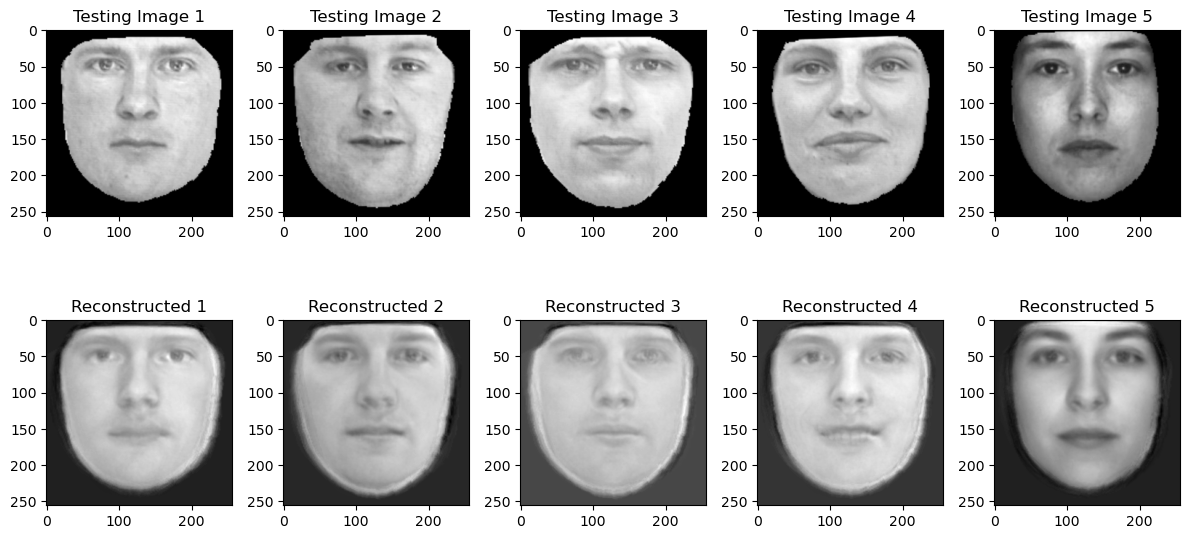

Mean Reconstruction Error: 3918.9078212600675


In [21]:
# Reconstruct testing images using the learned eigenfaces (K=30)
K_reconstruction = 30
top_eigenfaces_reconstruction = eigenvectors[:, :K_reconstruction]
projected_test_data = np.dot(test_data - mean_face, top_eigenfaces_reconstruction)
reconstructed_test_data = np.dot(projected_test_data, top_eigenfaces_reconstruction.T) + mean_face

# Visualize 5 testing images and their reconstructed counterparts
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_data[i].reshape((256, 256)), cmap='gray')
    plt.title(f'Testing Image {i + 1}')

    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_test_data[i].reshape((256, 256)), cmap='gray')
    plt.title(f'Reconstructed {i + 1}')

plt.tight_layout()
plt.savefig('figure2.png')
plt.show()

# Calculate the reconstruction error
reconstruction_errors = np.linalg.norm(reconstructed_test_data - test_data, axis=1)
mean_reconstruction_error = np.mean(reconstruction_errors)

# Print the reconstruction error
print(f"Mean Reconstruction Error: {mean_reconstruction_error}")

# Reconstruction error for different values of K

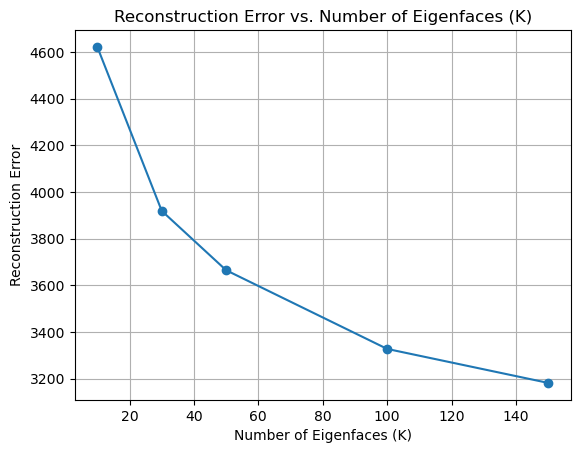

In [22]:
# Plot the reconstruction errors for different values of K
K_values = [10, 30, 50, 100, 150]
errors = []

for K in K_values:
    top_eigenfaces_errors = eigenvectors[:, :K]
    projected_test_data_errors = np.dot(test_data - mean_face, top_eigenfaces_errors)
    reconstructed_test_data_errors = np.dot(projected_test_data_errors, top_eigenfaces_errors.T) + mean_face
    reconstruction_errors = np.linalg.norm(reconstructed_test_data_errors - test_data, axis=1)
    mean_error = np.mean(reconstruction_errors)
    errors.append(mean_error)

# Plot the reconstruction errors
plt.plot(K_values, errors, marker='o')
plt.xlabel('Number of Eigenfaces (K)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Eigenfaces (K)')
plt.grid()
plt.savefig('figure3.png')
plt.show()